<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SqRA" data-toc-modified-id="SqRA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SqRA</a></span><ul class="toc-item"><li><span><a href="#Using-full-FG" data-toc-modified-id="Using-full-FG-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using full FG</a></span></li><li><span><a href="#Using-only-positions" data-toc-modified-id="Using-only-positions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Using only positions</a></span></li><li><span><a href="#Using-only-orientations" data-toc-modified-id="Using-only-orientations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Using only orientations</a></span></li></ul></li></ul></div>

In [3]:
import sys
import os

try:
    os.chdir(r"/home/hanaz63/PAPER_MOLECULAR_ROTATIONS_2022/nobackup/molgri")
    sys.path.append(r"/home/hanaz63/PAPER_MOLECULAR_ROTATIONS_2022/nobackup")
except FileNotFoundError:
    os.chdir(r"D:\HANA\phD\PAPER_2022\molecularRotationalGrids")
    sys.path.append(r"D:\HANA\phD\PAPER_2022\molecularRotationalGrids")
    
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
from scipy.spatial.transform import Rotation
import MDAnalysis as mda
from IPython.core.display import display
import matplotlib.pyplot as plt

from molgri.molecules.parsers import FileParser
from molgri.molecules.writers import PtIOManager
from molgri.molecules.transitions import SimulationHistogram
from molgri.space.fullgrid import FullGrid
from molgri.paths import PATH_INPUT_BASEGRO
from molgri.plotting.widgets import ViewManager, display_all_views, sync_all_views
from molgri.space.rotations import two_vectors2rot
from molgri.space.utils import k_argmax_in_array
from molgri.plotting.transition_plots import TransitionPlot

## SqRA

In [19]:
fg_full = FullGrid("8", "12", "linspace(0.2, 1, 5)", use_saved=False)
fg_position = FullGrid("1", "12", "linspace(0.2, 1, 5)", use_saved=False)
fg_orientation = FullGrid("8", "1", "1", use_saved=False)

pt_used = "H2O_H2O_0281"


Warning! For <=4 points, volumes, areas etc are only estimated.
Warning! For <=4 points, volumes, areas etc are only estimated.


### Using full FG

In [ ]:
sh = SimulationHistogram(pt_used, is_pt=True, second_molecule_selection="bynum 4:6",
                            full_grid=fg_full, use_saved=False)

tp = TransitionPlot(sh)
tp.plot_its(5, as_line=True, save=False)
plt.show()

In [ ]:
tp.plot_eigenvalues(num_eigenv=5, save=False)
plt.show()

In [ ]:
fig, ax = plt.subplots(3, sharex=True, sharey=True)
for i in range(3):
    tp.plot_one_eigenvector_flat(i, save=False, fig=fig, ax=ax[i])
plt.show()

In [ ]:
# take structures from most populated eigenvector 0 

vm = ViewManager(sh.trajectory_universe)
vm.fresh_view()

# largest absolute values of 0th eigevector
num_extremes = 5
magnitudes = sh.get_magnitude_ith_eigenvector(0)
argmax_index = k_argmax_in_array(np.abs(magnitudes), num_extremes)
print(f"{num_extremes} Most popular cells of FullGrid: {argmax_index}")
# now assign these to trajectory frames
assigned_frames = []
for one_argmax in argmax_index:
    assigned_frames.extend(sh.get_indices_same_cell(one_argmax))


vm.plot_frames_overlapping(assigned_frames)
vm.view

### Using only positions

Warning! For <=4 points, volumes, areas etc are only estimated.
False <molgri.space.voronoi.RotobjVoronoi object at 0x000001D0FBE19550>


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


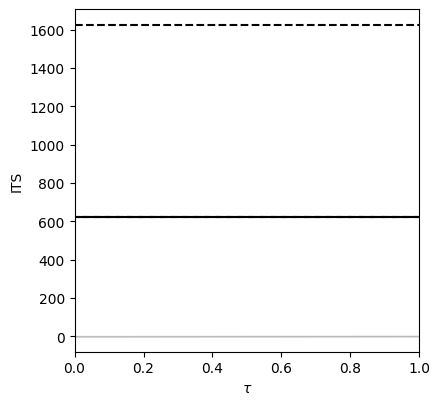

In [6]:
sh = SimulationHistogram(pt_used, is_pt=True, second_molecule_selection="bynum 4:6",
                            full_grid=fg_position, use_saved=False)

tp = TransitionPlot(sh)
tp.plot_its(5, as_line=True, save=False)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.34it/s]


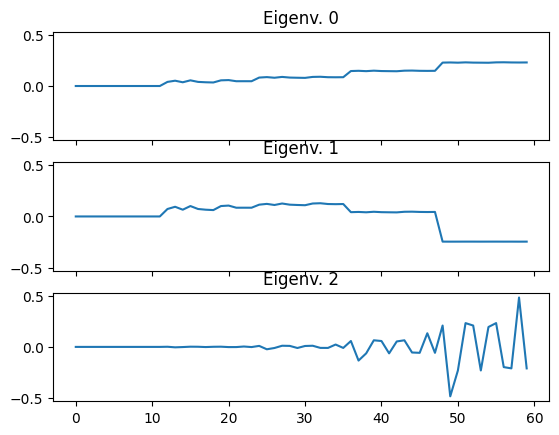

In [7]:
fig, ax = plt.subplots(3, sharex=True, sharey=True)
for i in range(3):
    tp.plot_one_eigenvector_flat(i, save=False, fig=fig, ax=ax[i])
plt.show()

In [9]:
# investigate max and min populated eigenv 2
# take structures from most populated eigenvector 0 

vm = ViewManager(sh.trajectory_universe)
vm.fresh_view()
magnitudes = sh.get_magnitude_ith_eigenvector(2)
vm.set_color_magnitude(magnitudes, )
print(magnitudes.shape)

# 
num_extremes = 5
most_positive = np.argmax(magnitudes)
most_negative = np.argmin(magnitudes)
print(f"2nd position eigenvector has most negative cell {most_negative} and most positive cell {most_positive}.")
# now assign these to trajectory frames
assigned_frames = []
colors = []
for one_argmax in [most_negative, most_positive]:
    all_assigned = sh.get_indices_same_cell(one_argmax)
    assigned_frames.extend(all_assigned)
    colors.extend([vm.current_magnitudes[one_argmax]]*len(all_assigned))
vm.current_magnitudes = None

vm.plot_frames_overlapping(assigned_frames, colors=colors)
vm.view

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.62it/s]


(60,)
2nd position eigenvector has most negative cell 49 and most positive cell 58.
{'color': '#0000ff'}
{'color': '#0000ff'}
{'color': '#0000ff'}
{'color': '#0000ff'}
{'color': '#0000ff'}
{'color': '#0000ff'}
{'color': '#0000ff'}
{'color': '#0000ff'}
{'color': '#ff0000'}
{'color': '#ff0000'}
{'color': '#ff0000'}
{'color': '#ff0000'}
{'color': '#ff0000'}
{'color': '#ff0000'}
{'color': '#ff0000'}
{'color': '#ff0000'}


NGLWidget()

### Using only orientations

Warning! For <=4 points, volumes, areas etc are only estimated.
False <molgri.space.voronoi.MikroVoronoi object at 0x000001D0834A1A90>
In 4D, only approximate calculation of Voronoi cells is possible. Proceeding numerically.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


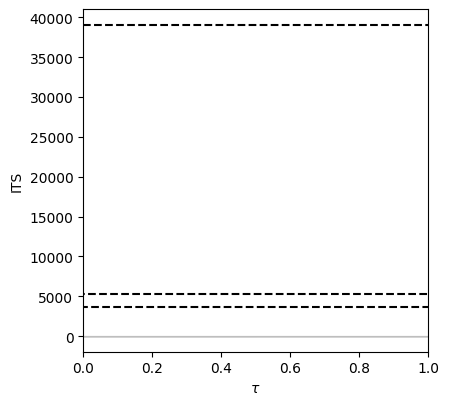

In [20]:
sh = SimulationHistogram(pt_used, is_pt=True, second_molecule_selection="bynum 4:6",
                            full_grid=fg_orientation, use_saved=False)

tp = TransitionPlot(sh)
tp.plot_its(4, as_line=True, save=False)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]


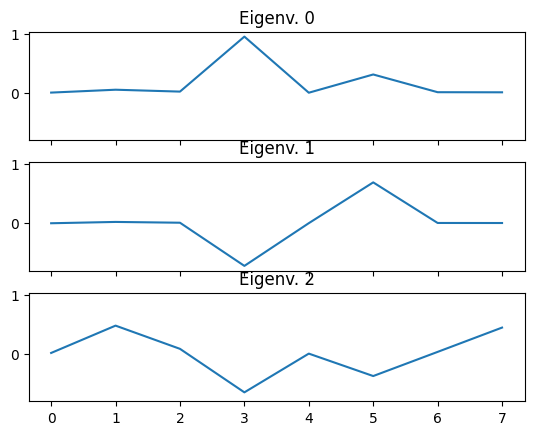

In [21]:
fig, ax = plt.subplots(3, sharex=True, sharey=True)
for i in range(3):
    tp.plot_one_eigenvector_flat(i, save=False, fig=fig, ax=ax[i])
plt.show()